In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#np.random.normal(mean,std,size)

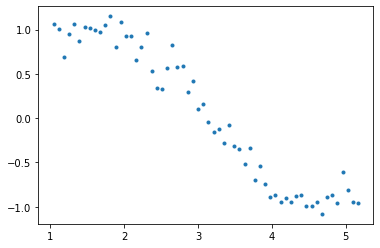

In [2]:
np.random.seed(10)

x = np.array([i*np.pi/180 for i in range(60,300,4)])

y = np.sin(x) + np.random.normal(0,0.15,len(x))

curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

plt.plot(curve['x'],curve['y'],'.')

In [3]:
def fit_poly( degree ):
    
    p = np.polyfit( curve.x, curve.y, deg = degree )
    
    curve['fit'] = np.polyval( p, curve.x )
    
    sn.regplot( curve.x, curve.y, fit_reg = False )
    
    return plt.plot( curve.x, curve.fit, label='fit' )

In [4]:
train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                  curve.y,
                                                  test_size = 0.40,
                                                  random_state = 100 )

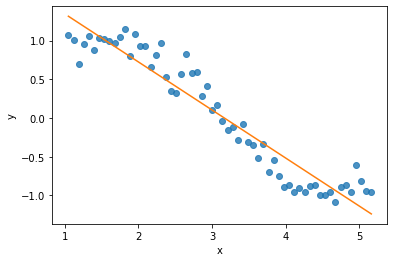

In [5]:
fit_poly(1)

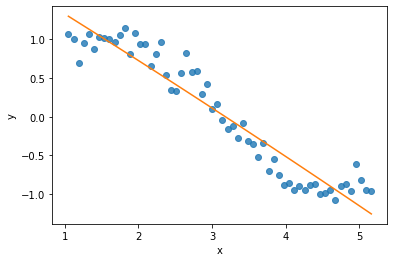

In [6]:
fit_poly(2)

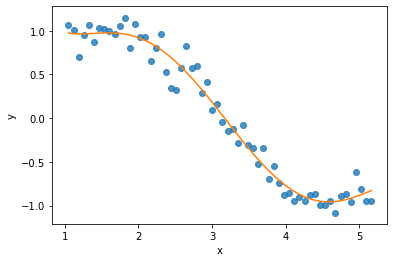

In [7]:
fit_poly(5)

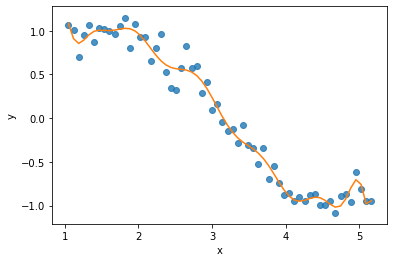

In [8]:
fit_poly(15)

In [9]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

In [10]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range( 1, 15 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( train_y, np.polyval( p, train_X ) ),
                      get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [11]:
rmse_df


,degree,rmse_train,rmse_test
0,1.0,0.231569,0.237707
1,2.0,0.229154,0.244414
2,3.0,0.115409,0.165920
3,4.0,0.113938,0.164451
4,5.0,0.110525,0.159416
5,6.0,0.105360,0.166479
6,7.0,0.104923,0.161330
7,8.0,0.104414,0.157364
8,9.0,0.100549,0.160113
9,10.0,0.100393,0.158239


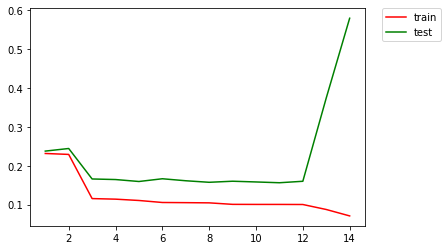

In [12]:
plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
          loc=2,
          borderaxespad=0)